In [1]:
# Import your libraries:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#load the dataset
sales_df = pd.read_csv('sales.csv')
sales_df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [3]:
#check the data types
sales_df.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [4]:
sales_df.state_holiday.unique()

array(['0', 'a', 'c', 'b'], dtype=object)

In [5]:
#convert date column to datetime
sales_df['date']= pd.to_datetime(sales_df['date'])

In [6]:
# convert state_holiday column to numeric
state_holiday_mapping = {'0':0,'a':1, 'c':2, 'b':3}
sales_df['state_holiday']= sales_df['state_holiday'].map(state_holiday_mapping)

In [7]:
#check dtype again
sales_df.dtypes

Unnamed: 0                      int64
store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                   int64
school_holiday                  int64
sales                           int64
dtype: object

In [8]:
# check null values
sales_df.isnull().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [9]:
sales_df.shape

(640840, 10)

In [10]:
#rename Unnamed: 0 columns as index
sales_df.rename(columns={'Unnamed: 0': 'index'},inplace=True)

In [11]:
sales_df.set_index('index', inplace=True)

In [12]:
sales_df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
index,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [13]:
sales_df.isnull().sum()

store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [14]:
#create correaltion matrix
sales_df_corr = sales_df.corr(numeric_only=True)

<Axes: >

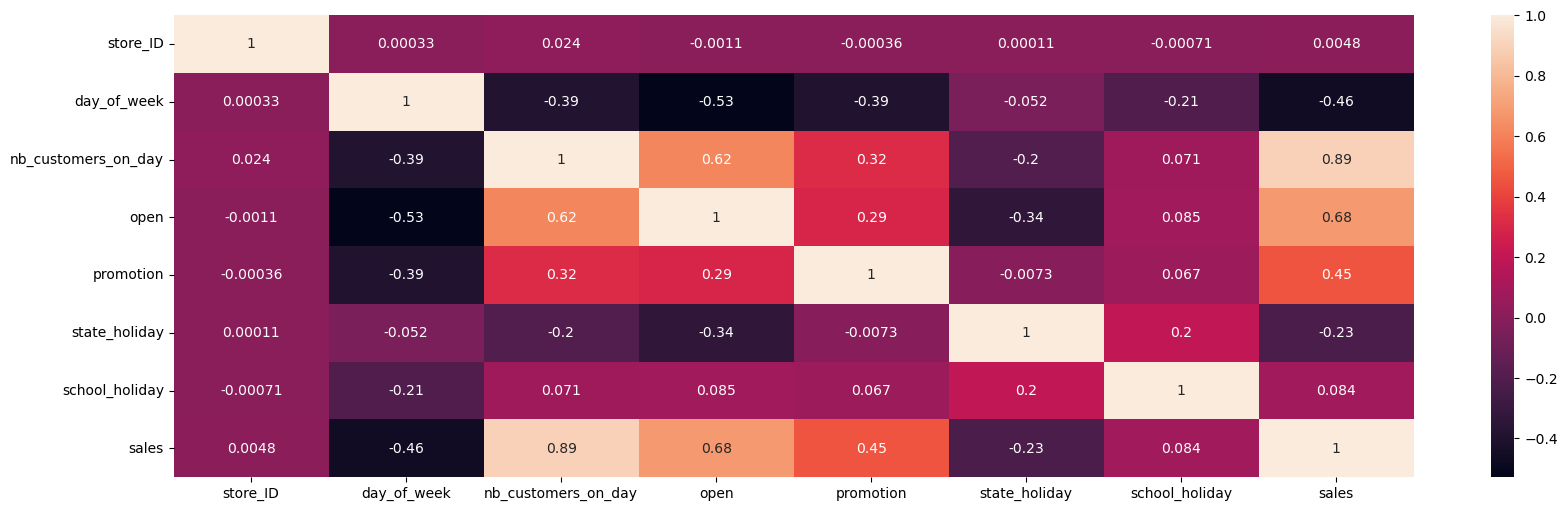

In [15]:
plt.figure(figsize=(20, 6))
sns.heatmap(sales_df_corr, annot=True)

In [16]:
# there no collinearity between columns so I will drop only date column that could create problem in linear Regression model.

In [17]:
sales_df['day_of_week'].unique()

array([4, 6, 2, 7, 3, 5, 1], dtype=int64)

In [18]:
sales_df.drop('date', axis=1, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# assuming sales as target
X = sales_df.drop('sales', axis=1)  
y = sales_df['sales'] 

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Initialize a linear regression model
model = LinearRegression()

In [22]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model's performance
r2_score_value = r2_score(y_test, y_pred)
print(r2_score_value)

0.8508312426194539


In [25]:
# conclusion: I think 0.8508 is good score and model is good in predicting the revenue. 


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Now try voting classifiers to see the performance of model

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor(random_state=1)
voting_reg = VotingRegressor(
estimators=[('lr', lin_reg), ('dt', tree_reg), ('knn', knn_reg)])
voting_reg.fit(X_train, y_train)
print('Train score:', voting_reg.score(X_train, y_train))
print('Test score:', voting_reg.score(X_test, y_test))

Train score: 0.9649584166075765
Test score: 0.9387821807392606


In [28]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print('Train score:', knn_reg.score(X_train, y_train))
print('Test score:', knn_reg.score(X_test, y_test))

Train score: 0.9408543328771066
Test score: 0.9063918133455313


In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Train score:', lin_reg.score(X_train, y_train))
print('Test score:', lin_reg.score(X_test, y_test))

Train score: 0.8535134171315677
Test score: 0.8508312426194539


conclusion: voting classifier provide successful result. If we see indivdual score of train and test data inlinear regression
and KNN though the test and train score are good in both cases but by using voting classifier the score improved for both train and test data.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=1) 
                                
rf_model.fit(X_train, y_train)
print('Train score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

Train score: 0.8171083649864864
Test score: 0.8175704334763318


Conclusion:The model is looking overfitting. let's increase the max_depth parameter from 3 to 5, to see the improvement in the performance of model.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=1) 
rf_model.fit(X_train, y_train)
print('Train score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

Train score: 0.8621996668050781
Test score: 0.8597671817254247


Conclusion: Now the result shows the model is now fitting the training data well and therefore the performance of modelis also improved to predict the test data.

In [32]:
# let's try cross validation
from sklearn.model_selection import cross_validate

# Initialize model and cross validate with 10 folds
results = cross_validate(rf_model, X_train, y_train, cv=10)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [33]:
# Review test scores per validation set
results['test_score']

array([0.86022471, 0.86299468, 0.86242465, 0.8640755 , 0.86177708,
       0.85976864, 0.8592345 , 0.8636952 , 0.86060446, 0.86120916])

In [34]:
# Review overall test score
results['test_score'].mean()

0.8616008585500717

Conclusion:The test score of random forest model using cross validation is 0.8616 which is very slightly higher than 0.8597( test score of rf_model). But it shows positive indication that model is consistant in its performance across different set of data.
* looking at the scores of all models Voting regressor is the best choice. So I will make predictions on the basis of voting regressor.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
X = sales_df.drop('sales', axis=1)
y = sales_df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor(random_state=1)
voting_reg = VotingRegressor(
estimators=[('lr', lin_reg), ('dt', tree_reg), ('knn', knn_reg)])
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(random_state=1)),
                            ('knn', KNeighborsRegressor())])

In [45]:
# Make predictions with the Voting Regressor
predictions = voting_reg.predict(X_test)


In [46]:
# Create a new DataFrame with 'index' and 'sales prediction'
output_df = pd.DataFrame({'index': X_test.index, 'sales_prediction': predictions})

In [47]:
r2_score_value = r2_score(y_test, predictions)
r2_score_value

0.9387821807392606

In [48]:
# Save the Predictions DataFrame to a CSV File
output_file_path = 'predictions.csv'
output_df.to_csv(output_file_path, index=False)
print(f"Predictions saved to {output_file_path}")

Predictions saved to predictions.csv


In [49]:
import pickle

In [50]:
#save the model

In [51]:
with open('voting_reg.pkl', 'wb') as file:
    pickle.dump('voting_reg_model', file)

In [53]:
pickle.dump('voting_reg_model', open('voting_reg.pkl', 'wb'))

In [54]:
# load the model
with open('voting_reg.pkl', 'rb') as file:
    voting_reg_model = pickle.load(file)

In [55]:
voting_reg_model = pickle.load(open('voting_reg.pkl', 'rb'))

In [56]:
# save the data
X_train.to_pickle('train_data.pkl')
y_train.to_pickle('train_label.pkl')

X_test.to_pickle('test_data.pkl')
y_test.to_pickle('test_label.pkl')

In [57]:
# load the data
X_train = pd.read_pickle('train_data.pkl')
X_train

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday
index,,,,,,,
346971,275,3,680,1,1,0,0
351987,729,3,1125,1,0,0,0
67795,483,2,936,1,1,0,1
510737,11,2,938,1,1,0,1
160295,202,4,410,1,0,0,0
...,...,...,...,...,...,...,...
362570,388,4,1040,1,0,0,1
334768,763,1,714,1,1,0,0
395791,1094,4,0,0,0,1,1


In [58]:
#load the dataset
df = pd.read_csv('validation_for students.csv', index_col=0)
df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
index,,,,,,,,
272371,415,7,01/03/2015,0,0,0,0,0
558468,27,7,29/12/2013,0,0,0,0,0
76950,404,3,19/03/2014,657,1,1,0,0
77556,683,2,29/01/2013,862,1,0,0,0
456344,920,3,19/03/2014,591,1,1,0,0


In [74]:
#check the data types
df.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [59]:
#convert date column to dateti
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', dayfirst=True)

In [60]:
# convert state_holiday column to numeric
state_holiday_mapping = {'0':0,'a':1, 'c':2, 'b':3}
df['state_holiday']= df['state_holiday'].map(state_holiday_mapping)

In [61]:
#check dtype again
df.dtypes

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                   int64
school_holiday                  int64
dtype: object

In [62]:
df.isna().sum()

store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
dtype: int64

In [63]:
df.drop('date',axis=1, inplace=True)

In [64]:
df.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday
index,,,,,,,
272371,415,7,0,0,0,0,0
558468,27,7,0,0,0,0,0
76950,404,3,657,1,1,0,0
77556,683,2,862,1,0,0,0
456344,920,3,591,1,1,0,0


In [73]:
voting_reg_model = pickle.load(open('voting_reg.pkl', 'rb'))

In [74]:
# Make predictions with the Voting Regressor
X_test = df
predictions_validation = voting_reg.predict(X_test)


In [75]:
# Create a new DataFrame with 'index' and 'sales prediction'
output_df_validation = pd.DataFrame({'index': X_test.index, 'sales_prediction': predictions})

In [77]:
# Save the Predictions DataFrame to a CSV File
output_file_path_validation = 'predictions_validation.csv'
output_df_validation.to_csv(output_file_path_validation, index=False)
print(f"Predictions saved to {output_file_path_validation}")

Predictions saved to predictions_validation.csv


In [86]:
!pip freeze > requirements.txt